In [8]:
#import libraries and dependencies
import pandas as pds
import numpy as npy
from sklearn.model_selection import train_test_split
import pickle

In [9]:
#import and read dataset of Apple.
dataFrame = pds.read_csv("C:\\Users\\Acer\\Desktop\\Closeing\\Apple\\AAPL(ClosingVal-today).csv")

In [10]:
dataFrame.head()

,Date,Open,High,Low,Volume,Close
0,1/2/1998,0.121652,0.145089,0.120536,718110400,0.145089
1,1/5/1998,0.147321,0.147879,0.135603,651873600,0.141741
2,1/6/1998,0.142299,0.178571,0.131696,1812473600,0.169085
3,1/7/1998,0.167969,0.169643,0.154576,1041622400,0.156250
4,1/8/1998,0.155692,0.166295,0.151228,774020800,0.162388


In [11]:
dataFrame.tail()

,Date,Open,High,Low,Volume,Close
5840,3/19/2021,119.900002,121.430000,119.680000,185023200,119.989998
5841,3/22/2021,120.330002,123.870003,120.260002,111912300,123.389999
5842,3/23/2021,123.330002,124.239998,122.139999,95467100,122.540001
5843,3/24/2021,122.820000,122.900002,120.070000,88530500,120.089996
5844,3/25/2021,119.540001,121.660004,119.000000,98696600,120.589996


In [12]:
#checking for null values and the total no.of records.
dataFrame.isna().sum()

Date      0
Open      0
High      0
Low       0
Volume    0
Close     0
dtype: int64

In [13]:
dataFrame.shape

(5845, 6)

In [14]:
#remove date coloumn.
del dataFrame['Date']

In [15]:
#assign x as dataframe.
trainColoumn = dataFrame

In [16]:
# assign X and y to the train and test coloumns.
trainColoumn = npy.array(trainColoumn.drop(['Close'], 1))
testColoumn = npy.array(dataFrame['Close'])

In [17]:
#data spliting and defining.
x_training, x_testing, y_training, y_testing = train_test_split(trainColoumn, testColoumn, test_size=0.2, random_state=42)


In [18]:
#validating the split has correctly divided the dataset.
x_training.shape

(4676, 4)

In [19]:
y_training.shape

(4676,)

In [20]:
x_testing.shape

(1169, 4)

In [21]:
y_testing.shape

(1169,)

# Random Forest

In [22]:
#import Roandom Forest model
from sklearn.ensemble import RandomForestRegressor

In [23]:
from datetime import datetime
start_time = datetime.now()

#fitting into the model
rfr = RandomForestRegressor(n_estimators=100, random_state=42,verbose=0)
rfr.fit(x_training, y_training)

end_time = datetime.now()
print('time consuemd: ',end_time-start_time)

time consuemd:  0:00:01.330973


In [24]:
#predict target from training data
rfr_predictions = rfr.predict(x_testing)
rfr_predictions

array([112.59874897,  90.82562399,   3.33983218, ..., 114.61442395,
        24.95193648,   0.24726457])

K fold validation

In [25]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [26]:
for train_index, test_index in kf.split(dataFrame):
    print(train_index, test_index)

[1949 1950 1951 ... 5842 5843 5844] [   0    1    2 ... 1946 1947 1948]
[   0    1    2 ... 5842 5843 5844] [1949 1950 1951 ... 3894 3895 3896]
[   0    1    2 ... 3894 3895 3896] [3897 3898 3899 ... 5842 5843 5844]


In [27]:
def get_score(model,x_training, x_testing, y_training, y_testing):
    model.fit(x_training,y_training)
    return model.score(x_testing,y_testing)

In [28]:
get_score(rfr,x_training, x_testing, y_training, y_testing)

0.9998190590167427

In [29]:
def mda(ytesting:npy.ndarray,predicted:npy.ndarray):
    """ Mean Directional Accuracy """
    return npy.mean((npy.sign(y_testing[1:]-y_testing[:-1])== npy.sign(predicted[1:]- predicted[:-1])).astype(int))

In [30]:
def MAPE(ytesting:npy.ndarray,predicted:npy.ndarray):
    """ Mean Absolute Percentage Error """
    mape = npy.mean(npy.abs((ytesting - predicted)/ytesting))*100
    return mape


In [44]:
def MBE(y_training, y_testing):
    '''
    Parameters:
        y_true (array): Array of observed values
        y_pred (array): Array of prediction values

    Returns:
        mbe (float): Biais score
    '''
    y_training = npy.array(y_training)
    y_testing = npy.array(y_testing)
    y_training = y_training.reshape(len(y_training),1)
    y_testing = y_testing.reshape(len(y_testing),1)   
    diff = (y_training-y_testing)
    mbe = diff.mean()
    print('MBE = ', mbe)

In [45]:
from sklearn import metrics

#Accuracy scores
print('Mean Absolute Error:', metrics.mean_absolute_error(y_testing, rfr_predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_testing, rfr_predictions))
print('Root Mean Squared Error:', npy.sqrt(metrics.mean_squared_error(y_testing, rfr_predictions)))
print('Mean Directional Accuracy:', mda(y_testing, rfr_predictions))
print ('Mean Absolute Percentage Error:', MAPE(y_testing,rfr_predictions))
# print('Mean r2 score:', metrics.r2_score(y_testing, rfr_predictions))

Mean Absolute Error: 0.1339989271475818
Mean Squared Error: 0.13294049357550008
Root Mean Squared Error: 0.36461005687652126
Mean Directional Accuracy: 0.997431506849315
Mean Absolute Percentage Error: 0.9702059055285508


In [46]:
print ('Mean Bias Error:', MBE(y_testing,rfr_predictions))

MBE =  0.00528104095018879
Mean Bias Error: None


### Predicting for 6th April

In [25]:
rfr.predict([[126.5,127.13,125.65,79463200]])

array([126.40607453])

In [51]:
pickle.dump(rfr, open("aapl_tdyPrediction.pkl", 'wb'))
print('model saved...')

model saved...


# Lasso

In [30]:
#import Lasso model
from sklearn.linear_model import Lasso

In [31]:
#fitting into the lasso model
lasso = Lasso(random_state=42,alpha=1.0,max_iter=1000, tol=0.0001)
lasso.fit(x_training, y_training)

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 474.25550777799685, tolerance: 300.280104083877
  positive)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=42,
      selection='cyclic', tol=0.0001, warm_start=False)

In [32]:
#predict target from training data
lasso_predictions = lasso.predict(x_testing)
# lasso_predictions

In [33]:
from sklearn import metrics

#Accuracy scores
print('Mean Absolute Error:', metrics.mean_absolute_error(y_testing, lasso_predictions))
print('Mean r2 score:', metrics.r2_score(y_testing, lasso_predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_testing, lasso_predictions))
print('Root Mean Squared Error:', npy.sqrt(metrics.mean_squared_error(y_testing, lasso_predictions)))
print('Mean Directional Accuracy:', mda(y_testing, lasso_predictions))
print ('Mean Absolute Percentage Error:', MAPE(y_testing,lasso_predictions))

Mean Absolute Error: 0.18675781885437812
Mean r2 score: 0.9997817830058067
Mean Squared Error: 0.1603278284023268
Root Mean Squared Error: 0.40040957581247577
Mean Directional Accuracy: 0.9931506849315068
Mean Absolute Percentage Error: 5.868356753584421


### Graph

In [71]:
import matplotlib.pyplot as plt

In [72]:
newDataFrame=pds.read_csv("C:\\Users\\Acer\\Desktop\\Closeing\\Apple\\Apple(DataFrom26March)-Today.csv")

In [73]:
newDataFrame.head()

,Date,Open,High,Low,Volume,Close
0,26-Mar-21,120.349998,121.480003,118.919998,93958900,121.209999
1,29-Mar-21,121.650002,122.580002,120.730003,80819200,121.389999
2,30-Mar-21,120.110001,120.400002,118.860001,85671900,119.900002
3,31-Mar-21,121.650002,123.519997,121.150002,118323800,122.150002
4,1-Apr-21,123.660004,124.180000,122.489998,74957400,123.000000


In [74]:
keep_columns=['Open','High','Low','Volume']
new_x_val=newDataFrame[keep_columns]

In [75]:
predictions = rfr.predict(new_x_val)
predictions

array([120.36069884, 122.2760013 , 118.95429913, 122.58340059,
       124.20009962, 124.76924924, 126.46539931, 127.21832393,
       128.83669888])

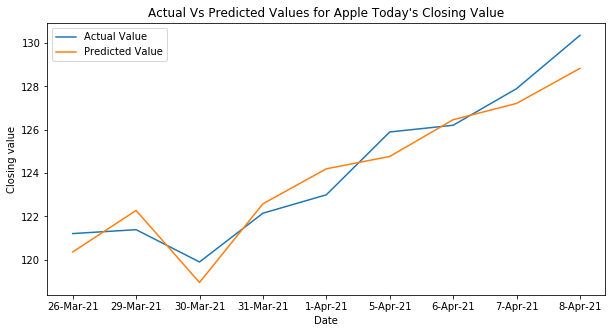

In [76]:
plt.figure(figsize=(10,5))
plt.plot(newDataFrame['Date'],newDataFrame['Close'], label ='Actual Value')
plt.plot(newDataFrame['Date'],predictions, label ='Predicted Value')
plt.xlabel('Date')
plt.ylabel('Closing value')
plt.title("Actual Vs Predicted Values for Apple Today's Closing Value")
plt.legend()

In [47]:
# save_results_to = 'C:/Users/Purushoth/Desktop/Results/'
plt.savefig('image.png', dpi = 300, bbox_inches='tight')
print('image saved.')

image saved.


<Figure size 432x288 with 0 Axes>

# XGBoost

In [49]:
#import xgBoost model
from xgboost import XGBRegressor

In [50]:
from datetime import datetime
start_time = datetime.now()

#fitting into the model
xgb = XGBRegressor(n_estimators=100, random_state=42,verbose=0)
xgb.fit(x_training,y_training)

end_time = datetime.now()
print('time consuemd: ',end_time-start_time)

[17:56:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


time consuemd:  0:00:01.726037


In [51]:
#predict target from training data
xgb_predictions = xgb.predict(x_testing)
xgb_predictions

array([113.28482  ,  91.41878  ,   3.3423882, ..., 114.86843  ,
        24.927343 ,   0.2599721], dtype=float32)

In [52]:
#Accuracy scores

print('Mean Absolute Error:', metrics.mean_absolute_error(y_testing, xgb_predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_testing, xgb_predictions))
print('Root Mean Squared Error:', npy.sqrt(metrics.mean_squared_error(y_testing, xgb_predictions)))
print('Mean Directional Accuracy:', mda(y_testing, xgb_predictions))
print('Mean r2 score:', metrics.r2_score(y_testing, xgb_predictions))
print ('Mean Absolute Percentage Error:', MAPE(y_testing,xgb_predictions))

Mean Absolute Error: 0.1633006374531706
Mean Squared Error: 0.14849120178489508
Root Mean Squared Error: 0.385345561522246
Mean Directional Accuracy: 0.9948630136986302
Mean r2 score: 0.9997978934534287
Mean Absolute Percentage Error: 1.5644861312472096


# SVM


In [53]:
#import SVR regression model
from sklearn.svm import SVR

In [54]:
from datetime import datetime
start_time = datetime.now()

#fitting into the model
svm = SVR(kernel='rbf', C=100, gamma='auto', degree=3, epsilon=.1,coef0=1)
svm.fit(x_training,y_training)

end_time = datetime.now()
print('time consuemd: ',end_time-start_time)

time consuemd:  0:00:02.312896


In [55]:
#predict target from training data
svm_predictions = svm.predict(x_testing)
svm_predictions

array([18.18556208, 18.18556208, 18.18556208, ..., 18.18556208,
       18.18556208, 18.18556208])

In [57]:
#Accuracy scores

print('Mean Absolute Error:', metrics.mean_absolute_error(y_testing, svm_predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_testing, svm_predictions))
print('Root Mean Squared Error:', npy.sqrt(metrics.mean_squared_error(y_testing, svm_predictions)))
print('Mean Directional Accuracy:', mda(y_testing, svm_predictions))
print('Mean r2 score:', metrics.r2_score(y_testing, svm_predictions))
print ('Mean Absolute Percentage Error:', MAPE(y_testing,svm_predictions))

Mean Absolute Error: 18.784186803052656
Mean Squared Error: 733.4230660937308
Root Mean Squared Error: 27.08178476566363
Mean Directional Accuracy: 0.010273972602739725
Mean r2 score: 0.0017617119255177727
Mean Absolute Percentage Error: 1652.8219422583725


# DecisionTreeRegressor

In [58]:
from sklearn.tree import DecisionTreeRegressor

In [59]:
dtr = DecisionTreeRegressor(random_state=42,splitter='best')
dtr.fit(x_training,y_training)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [60]:
dtr_predictions = dtr.predict(x_testing)

In [63]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_testing, dtr_predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_testing, dtr_predictions))
print('Root Mean Squared Error:', npy.sqrt(metrics.mean_squared_error(y_testing, dtr_predictions)))
print('Mean Directional Accuracy:', mda(y_testing, dtr_predictions))
print('Mean r2 score:', metrics.r2_score(y_testing, dtr_predictions))
print ('Mean Absolute Percentage Error:', MAPE(y_testing,dtr_predictions))

Mean Absolute Error: 0.18606315985172514
Mean Squared Error: 0.28180798373211496
Root Mean Squared Error: 0.5308558973319548
Mean Directional Accuracy: 0.997431506849315
Mean r2 score: 0.9996164403163037
Mean Absolute Percentage Error: 1.2382924998785616
